<a href="https://colab.research.google.com/github/Jesen456/bali-weather-capstone/blob/main/Bali_Weather_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Date  Temp_Max  Temp_Min  Precipitation
0  2025-07-06      27.9      25.4           13.0
1  2025-07-07      27.8      25.8            0.6
2  2025-07-08      27.6      24.9            0.5
3  2025-07-09      27.4      25.3            1.5
4  2025-07-10      27.4      25.4            0.9


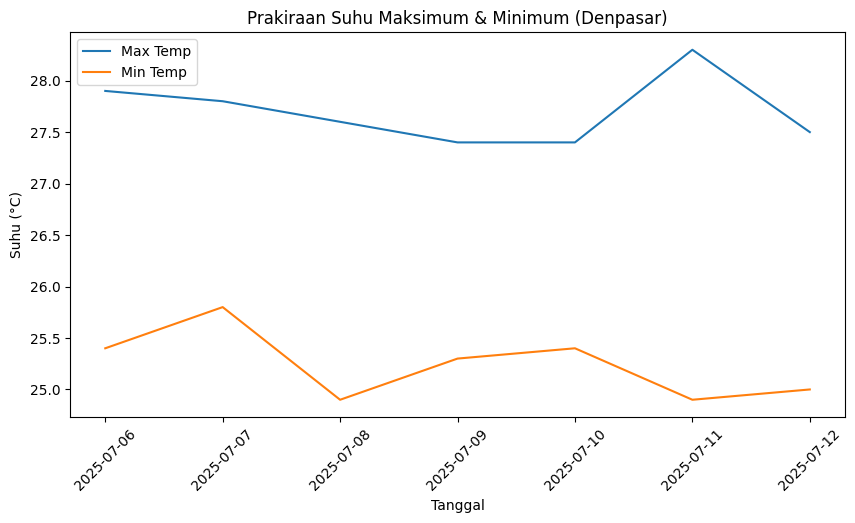

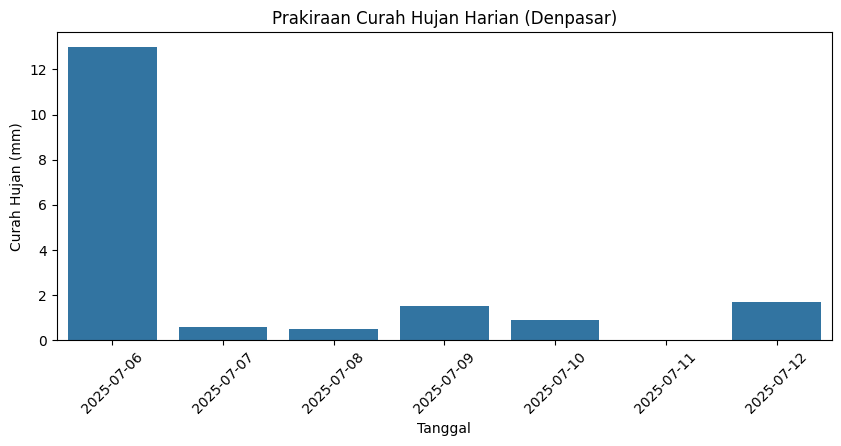

In [29]:
# ========================================
# Capstone Project: Bali Weather Analysis
# Using Open-Meteo API (Alternative to scraping)
# ========================================

!pip install pandas requests matplotlib seaborn

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Request ke Open-Meteo API
latitude = -8.65   # Denpasar
longitude = 115.22

url = f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&daily=temperature_2m_max,temperature_2m_min,precipitation_sum&timezone=Asia%2FBangkok"

response = requests.get(url)
data = response.json()

# 2. Convert ke DataFrame
df = pd.DataFrame({
    'Date': data['daily']['time'],
    'Temp_Max': data['daily']['temperature_2m_max'],
    'Temp_Min': data['daily']['temperature_2m_min'],
    'Precipitation': data['daily']['precipitation_sum']
})

print(df.head())

# 3. Visualisasi
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Temp_Max', data=df, label='Max Temp')
sns.lineplot(x='Date', y='Temp_Min', data=df, label='Min Temp')
plt.title('Prakiraan Suhu Maksimum & Minimum (Denpasar)')
plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x='Date', y='Precipitation', data=df)
plt.title('Prakiraan Curah Hujan Harian (Denpasar)')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.xticks(rotation=45)
plt.show()

# 4. Simpan CSV
df.to_csv('/content/denpasar_weather_forecast.csv', index=False)


In [30]:
import pandas as pd

# Load CSV (jika Colab baru, pastikan file sudah ada di /content)
df = pd.read_csv('/content/denpasar_weather_forecast.csv')
print(df.head())

# Buat kondisi cuaca sederhana:
# Jika curah hujan > 5mm → Hujan, 1-5mm → Mendung, 0mm → Cerah
def classify_condition(row):
    if row['Precipitation'] > 5:
        return 'Hujan'
    elif row['Precipitation'] > 0:
        return 'Mendung'
    else:
        return 'Cerah'

df['Condition'] = df.apply(classify_condition, axis=1)
print(df[['Date', 'Temp_Max', 'Temp_Min', 'Precipitation', 'Condition']])

# Insight Rangkuman
print("Insight:")
print(f"Hari dengan suhu maksimum tertinggi: {df['Temp_Max'].max():.2f}°C")
print(f"Hari dengan suhu minimum terendah: {df['Temp_Min'].min():.2f}°C")
print(f"Rata-rata curah hujan: {df['Precipitation'].mean():.2f} mm")
print(f"Mayoritas kondisi cuaca: {df['Condition'].mode()[0]}")

         Date  Temp_Max  Temp_Min  Precipitation
0  2025-07-06      27.9      25.4           13.0
1  2025-07-07      27.8      25.8            0.6
2  2025-07-08      27.6      24.9            0.5
3  2025-07-09      27.4      25.3            1.5
4  2025-07-10      27.4      25.4            0.9
         Date  Temp_Max  Temp_Min  Precipitation Condition
0  2025-07-06      27.9      25.4           13.0     Hujan
1  2025-07-07      27.8      25.8            0.6   Mendung
2  2025-07-08      27.6      24.9            0.5   Mendung
3  2025-07-09      27.4      25.3            1.5   Mendung
4  2025-07-10      27.4      25.4            0.9   Mendung
5  2025-07-11      28.3      24.9            0.0     Cerah
6  2025-07-12      27.5      25.0            1.7   Mendung
Insight:
Hari dengan suhu maksimum tertinggi: 28.30°C
Hari dengan suhu minimum terendah: 24.90°C
Rata-rata curah hujan: 2.60 mm
Mayoritas kondisi cuaca: Mendung


In [31]:
# Simpan file final ke CSV
df.to_csv('/content/denpasar_weather_forecast_final.csv', index=False)
print("✅ File final disimpan: denpasar_weather_forecast_final.csv")


✅ File final disimpan: denpasar_weather_forecast_final.csv


In [32]:
from google.colab import files
files.download('/content/denpasar_weather_forecast_final.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>